# Loan Default Prediction Challenge

# Load the data

In [4]:
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Exploratory data analysis

In [5]:
# generate age instead of date_of_birth
from datetime import datetime
train['date_of_birth'] = pd.to_datetime(train['date_of_birth'])

# assume reference is 2025/05/01
reference_date = pd.to_datetime("2025-05-01")
train['age'] = (reference_date - train['date_of_birth']).dt.days // 365
train.head()

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target,age
0,1,1993-03-14,1,0.036495,0.208897,2400,6,2,0,0,570,817,0,32
1,2,1966-09-27,1,0.023423,0.260438,2200,6,1,0,0,741,756,0,58
2,3,1931-01-11,2,0.027205,0.335922,3000,6,1,0,1,805,779,0,94
3,4,1953-01-07,1,0.009141,0.353779,2100,2,4,0,0,573,829,0,72
4,5,1943-11-17,0,0.068424,0.314966,2500,2,3,0,0,833,629,0,81


In [35]:
print(train.shape)
print(train.isnull().sum())
print(train.columns)
print(train.dtypes)
print(train.dtypes.value_counts())


(20839, 14)
id                          0
date_of_birth               0
number_dependants           0
credit_utilization          0
debt_to_income_ratio        0
monthly_income              0
number_open_credit_lines    0
number_open_loans           0
number_90_days_past_due     0
number_charged_off          0
score1                      0
score2                      0
target                      0
age                         0
dtype: int64
Index(['id', 'date_of_birth', 'number_dependants', 'credit_utilization',
       'debt_to_income_ratio', 'monthly_income', 'number_open_credit_lines',
       'number_open_loans', 'number_90_days_past_due', 'number_charged_off',
       'score1', 'score2', 'target', 'age'],
      dtype='object')
id                                   int64
date_of_birth               datetime64[ns]
number_dependants                    int64
credit_utilization                 float64
debt_to_income_ratio               float64
monthly_income                       int64
num

In [36]:
print(train.describe())

                 id                  date_of_birth  number_dependants  \
count  20839.000000                          20839       20839.000000   
mean   10923.946878  1964-03-25 13:43:08.012860512           0.483421   
min        1.000000            1829-06-03 00:00:00          -1.000000   
25%     5482.000000            1946-07-09 00:00:00           0.000000   
50%    10929.000000            1964-05-03 00:00:00           0.000000   
75%    16366.500000            1982-02-12 12:00:00           1.000000   
max    21839.000000            1999-05-22 00:00:00           6.000000   
std     6295.585008                            NaN           0.719653   

       credit_utilization  debt_to_income_ratio  monthly_income  \
count        2.083900e+04          20839.000000    20839.000000   
mean         4.815929e-02              0.333507     2290.772110   
min          3.932283e-07              0.029386     2000.000000   
25%          1.436676e-02              0.247782     2100.000000   
50%    

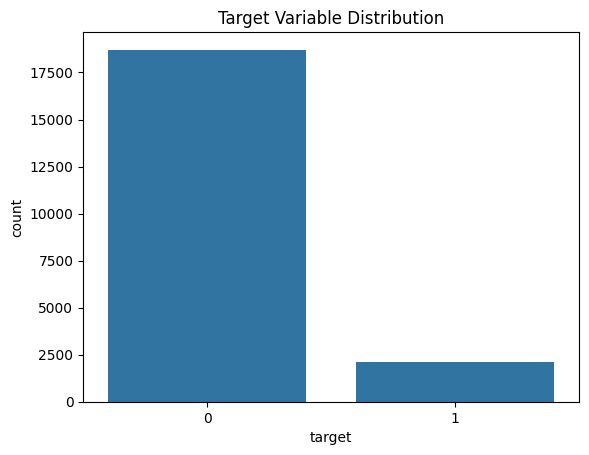

target
0    89.783579
1    10.216421
Name: proportion, dtype: float64


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for target
sns.countplot(x="target", data=train)
plt.title("Target Variable Distribution")
plt.show()

# Print percentages
print(train['target'].value_counts(normalize=True) * 100)


# Preprocessing

In [6]:
train[train['age'] > 100]
train = train[train['age'] <= 100]

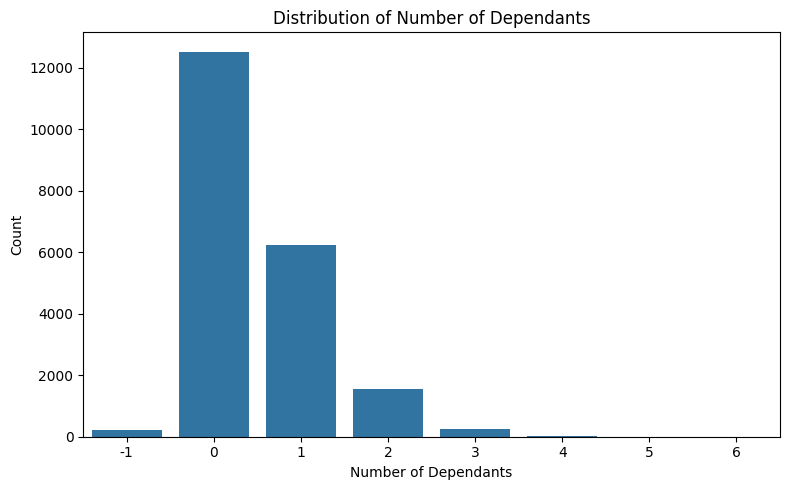

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for number_dependants
plt.figure(figsize=(8, 5))
sns.countplot(x='number_dependants', data=train)
plt.title("Distribution of Number of Dependants")
plt.xlabel("Number of Dependants")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [7]:
train[train['number_dependants'] < 0]

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target,age
60,63,1954-07-04,-1,0.150175,0.145637,3200,6,2,0,0,639,792,0,70
231,246,1971-12-04,-1,0.052516,0.470119,2000,7,1,0,0,535,690,0,53
359,381,1937-12-12,-1,0.073272,0.325866,2200,1,4,0,0,738,626,0,87
762,805,1987-09-08,-1,0.036400,0.291304,2100,3,2,0,0,756,801,0,37
782,825,1996-02-24,-1,0.099829,0.384028,2100,6,1,0,0,632,587,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20264,21233,1961-07-04,-1,0.042974,0.160677,2400,8,1,0,0,747,574,0,63
20290,21259,1940-09-24,-1,0.015026,0.309135,2100,4,2,0,0,622,676,0,84
20376,21350,1963-11-04,-1,0.095885,0.319937,2100,6,1,0,0,710,810,0,61
20391,21366,1972-07-24,-1,0.002406,0.330496,2600,5,0,0,0,564,540,0,52


In [8]:
train['number_dependants'] = train['number_dependants'].replace(-1, 0) #missing value are filled with median
# train = train[train['number_dependants'] >= 0]

In [9]:
train = train.drop(columns=['id', 'date_of_birth'])

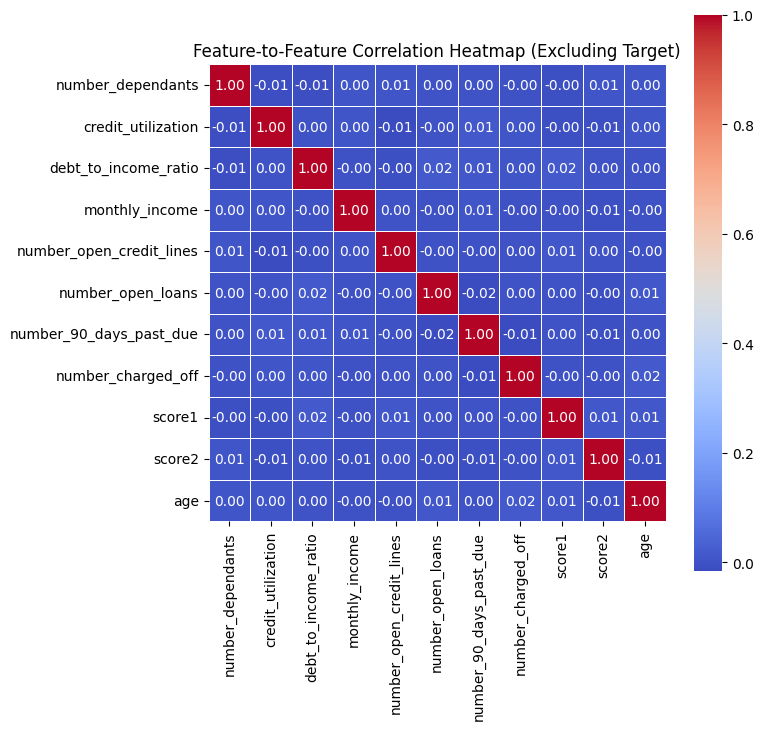

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop 'target' and compute correlation
features_only = train.drop(columns=['target'])
corr_matrix = features_only.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 7.5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Feature-to-Feature Correlation Heatmap (Excluding Target)")
plt.tight_layout()
plt.show()

In [44]:
# Correlation of each feature with the target
corr_target = train.corr(numeric_only=True)['target'].drop('target').sort_values(key=abs, ascending=False)
print(corr_target)

monthly_income             -0.162773
score1                     -0.133139
score2                     -0.132959
credit_utilization         -0.010744
number_open_credit_lines    0.009453
number_open_loans          -0.007156
number_90_days_past_due     0.005267
debt_to_income_ratio        0.004502
age                        -0.002516
number_charged_off          0.001742
number_dependants           0.000943
Name: target, dtype: float64


Seen from the correlation heatmap and the table above, there is little collinearity between the features, and the features have weak correlation with the target. We could then engineer some features that have higher correlation.

# Feature engineering

In [ ]:
# Define features and target
X = train.drop(columns=['target'])
y = train['target']

X['util_income_interaction'] = X['credit_utilization'] * X['monthly_income']
X['age_loans_interaction'] = X['age'] * X['number_open_loans']
X["income_score1_interaction"] = X["monthly_income"] * X["score1"]
X["income_score2_interaction"] = X["monthly_income"] * X["score2"]
X["debt_to_income_utilization"] = X["debt_to_income_ratio"] * X["credit_utilization"]

# X["score_diff"] = X["score1"] - X["score2"]

X["loans_per_credit_line"] = X["number_open_loans"] / (1 + X["number_open_credit_lines"])
# X["util_income_ratio"] = X["credit_utilization"] / X["monthly_income"]
X["age_income_ratio"] = X["monthly_income"] / X["age"]

In [ ]:
# Combine features and target
df_corr = X.copy()
df_corr["target"] = y

# Compute correlation with the target
correlation_with_target = df_corr.corr(numeric_only=True)["target"].sort_values(ascending=False)

# Display
print("📊 Correlation between features and target:")
print(correlation_with_target)
# 18 features

📊 Correlation between features and target:
target                        1.000000
number_open_credit_lines      0.009453
number_90_days_past_due       0.005267
debt_to_income_ratio          0.004502
number_charged_off            0.001742
number_dependants             0.000943
age                          -0.002516
number_open_loans            -0.007156
age_loans_interaction        -0.007643
debt_to_income_utilization   -0.009081
credit_utilization           -0.010744
loans_per_credit_line        -0.012445
util_income_interaction      -0.033111
age_income_ratio             -0.054541
score2                       -0.132959
score1                       -0.133139
monthly_income               -0.162773
income_score2_interaction    -0.201012
income_score1_interaction    -0.201552
Name: target, dtype: float64


I plan to compare XGBoost, logistic regression and SVM. In XGBoost, I decided to apply resampling techniques.

# Resampling: imbalanced target data

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import BorderlineSMOTE

### normal resampling

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import numpy as np

def evaluate_resampling_strategy(X, y, sampler_name, sampler_obj, k=5):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    f1_scores = []
    precision_scores = []
    recall_scores = []
    auc_scores = []

    for train_idx, val_idx in skf.split(X, y):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        # Apply resampling if specified
        if sampler_obj is not None:
            X_train_fold, y_train_fold = sampler_obj.fit_resample(X_train_fold, y_train_fold)

        # Train model
        model = XGBClassifier(eval_metric='logloss', random_state=42)
        model.fit(X_train_fold, y_train_fold)

        # Predict labels and probabilities
        y_pred = model.predict(X_val_fold)
        y_prob = model.predict_proba(X_val_fold)[:, 1]

        # Evaluate metrics
        precision_scores.append(precision_score(y_val_fold, y_pred))
        recall_scores.append(recall_score(y_val_fold, y_pred))
        f1_scores.append(f1_score(y_val_fold, y_pred))
        auc_scores.append(roc_auc_score(y_val_fold, y_prob))

    # Print average metrics
    print(f"{sampler_name:<20} | Precision: {np.mean(precision_scores):.4f} | Recall: {np.mean(recall_scores):.4f} | F1 Score: {np.mean(f1_scores):.4f} | AUC: {np.mean(auc_scores):.4f}")

In [69]:
evaluate_resampling_strategy(X, y, "Original", None)
evaluate_resampling_strategy(X, y, "SMOTE", SMOTE(random_state=42))
evaluate_resampling_strategy(X, y, "UnderSampler", RandomUnderSampler(random_state=42))
evaluate_resampling_strategy(X, y, "SMOTE + Tomek", SMOTETomek(random_state=42))
evaluate_resampling_strategy(X, y, "Borderline-SMOTE", BorderlineSMOTE(random_state=42))

Original             | Precision: 0.2663 | Recall: 0.0564 | F1 Score: 0.0931 | AUC: 0.7303
SMOTE                | Precision: 0.2855 | Recall: 0.1245 | F1 Score: 0.1733 | AUC: 0.7218
UnderSampler         | Precision: 0.1857 | Recall: 0.6936 | F1 Score: 0.2929 | AUC: 0.7315
SMOTE + Tomek        | Precision: 0.2742 | Recall: 0.1518 | F1 Score: 0.1953 | AUC: 0.7308
Borderline-SMOTE     | Precision: 0.2744 | Recall: 0.1330 | F1 Score: 0.1790 | AUC: 0.7287


In [71]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter

# Define sampler classes
sampler_classes = {
    "SMOTE": SMOTE,
    "UnderSampler": RandomUnderSampler,
    "SMOTE + Tomek": SMOTETomek,
    "Borderline-SMOTE": BorderlineSMOTE
}

# Include original dataset info
class_counts = Counter(y)
total = len(y)
print(f"{'Original':<30} | Total: {total:<6} | "
      f"Class 0: {class_counts[0]/total:.2%} | "
      f"Class 1: {class_counts[1]/total:.2%}")

# Evaluate each sampler with 1:1 sampling strategy
for name, sampler_cls in sampler_classes.items():
    sampler = sampler_cls(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    total = len(y_resampled)
    class_counts = Counter(y_resampled)

    print(f"{name + ' (1:1)':<30} | Total: {total:<6} | "
          f"Class 0: {class_counts[0]/total:.2%} | "
          f"Class 1: {class_counts[1]/total:.2%}")


Original                       | Total: 20832  | Class 0: 89.78% | Class 1: 10.22%
SMOTE (1:1)                    | Total: 37408  | Class 0: 50.00% | Class 1: 50.00%
UnderSampler (1:1)             | Total: 4256   | Class 0: 50.00% | Class 1: 50.00%
SMOTE + Tomek (1:1)            | Total: 33950  | Class 0: 50.00% | Class 1: 50.00%
Borderline-SMOTE (1:1)         | Total: 37408  | Class 0: 50.00% | Class 1: 50.00%


Precisions are not good enough. Moreover, though undersampler has the best f1 score, it is trained on a relatively smaller sample size. Therefore, increasing the majority number in the training set, say majority:monirity=2:1 is worth trying. Another reason is that in the final test dataset, there is too much minority class.

### 2:1 resampling

In [150]:
def evaluate_resampling_strategy(X, y, sampler_name, sampler_class, k=5):
    from collections import Counter
    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
    from sklearn.model_selection import StratifiedKFold
    from xgboost import XGBClassifier
    import numpy as np

    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    precision_scores, recall_scores, f1_scores, auc_scores = [], [], [], []

    for train_idx, val_idx in skf.split(X, y):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        # Resample if needed
        if sampler_class is not None:
            counts = Counter(y_train_fold)
            n_minority = counts[1]
            n_majority = counts[0]

            if sampler_class.__name__ in ["SMOTE", "BorderlineSMOTE", "SMOTETomek"]:
                sampling_strategy = 0.5  # minority will be 50% of majority
            else:
                sampling_strategy = {0: 2 * n_minority}  # majority = 2 × minority

            sampler = sampler_class(sampling_strategy=sampling_strategy, random_state=42)
            X_train_fold, y_train_fold = sampler.fit_resample(X_train_fold, y_train_fold)

        # Train XGBoost
        model = XGBClassifier(eval_metric='logloss', random_state=42)
        model.fit(X_train_fold, y_train_fold)

        # Predict
        y_pred = model.predict(X_val_fold)
        y_prob = model.predict_proba(X_val_fold)[:, 1]

        precision_scores.append(precision_score(y_val_fold, y_pred))
        recall_scores.append(recall_score(y_val_fold, y_pred))
        f1_scores.append(f1_score(y_val_fold, y_pred))
        auc_scores.append(roc_auc_score(y_val_fold, y_prob))

    # Report
    print(f"{sampler_name:<20} | Precision: {np.mean(precision_scores):.4f} | Recall: {np.mean(recall_scores):.4f} | F1 Score: {np.mean(f1_scores):.4f} | AUC: {np.mean(auc_scores):.4f}")


In [152]:
evaluate_resampling_strategy(X, y, "Original", None)
evaluate_resampling_strategy(X, y, "SMOTE", SMOTE)
evaluate_resampling_strategy(X, y, "UnderSampler", RandomUnderSampler)
evaluate_resampling_strategy(X, y, "SMOTE + Tomek", SMOTETomek)
evaluate_resampling_strategy(X, y, "Borderline-SMOTE", BorderlineSMOTE)

Original             | Precision: 0.2663 | Recall: 0.0564 | F1 Score: 0.0931 | AUC: 0.7303
SMOTE                | Precision: 0.2844 | Recall: 0.0982 | F1 Score: 0.1459 | AUC: 0.7289
UnderSampler         | Precision: 0.2204 | Recall: 0.4643 | F1 Score: 0.2988 | AUC: 0.7342
SMOTE + Tomek        | Precision: 0.2852 | Recall: 0.1222 | F1 Score: 0.1709 | AUC: 0.7329
Borderline-SMOTE     | Precision: 0.2840 | Recall: 0.1109 | F1 Score: 0.1593 | AUC: 0.7279


In [157]:
from collections import Counter

# Dictionary of sampler classes
samplers = {
    "Original": None,
    "SMOTE (2:1)": SMOTE,
    "UnderSampler (2:1)": RandomUnderSampler,
    "SMOTE + Tomek (2:1)": SMOTETomek,
    "Borderline-SMOTE (2:1)": BorderlineSMOTE
}

for name, sampler_cls in samplers.items():
    if sampler_cls is None:
        y_resampled = y
        total = len(y)
    else:
        counts = Counter(y)
        n_minority = counts[1]

        if sampler_cls.__name__ in ["SMOTE", "BorderlineSMOTE", "SMOTETomek"]:
            sampling_strategy = 0.5  # minority will be 50% of majority
        else:
            sampling_strategy = {0: 2 * n_minority}

        sampler = sampler_cls(sampling_strategy=sampling_strategy, random_state=42)
        X_resampled, y_resampled = sampler.fit_resample(X, y)
        total = len(y_resampled)

    class_counts = Counter(y_resampled)
    print(f"{name:<25} | Total: {total:<6} | "
          f"Class 0: {class_counts[0]/total:.2%} | "
          f"Class 1: {class_counts[1]/total:.2%}")


Original                  | Total: 20832  | Class 0: 89.78% | Class 1: 10.22%
SMOTE (2:1)               | Total: 28056  | Class 0: 66.67% | Class 1: 33.33%
UnderSampler (2:1)        | Total: 6384   | Class 0: 66.67% | Class 1: 33.33%
SMOTE + Tomek (2:1)       | Total: 25226  | Class 0: 68.54% | Class 1: 31.46%
Borderline-SMOTE (2:1)    | Total: 28056  | Class 0: 66.67% | Class 1: 33.33%


# Modeling

## Hyperparameter tuning for XGBoost

In [56]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
import numpy as np

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 4, 6],
    'learning_rate': [0.01, 0.03, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 6],
    'scale_pos_weight': [1.0, 1.5, 2.0],
    'gamma': [0, 5, 10],
    'reg_alpha': [0, 4, 8],
    'reg_lambda': [0.5, 1.0, 1.5]
}

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score)

# Run randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring=scorer,
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_resampled, y_resampled)

print("✅ Best parameters found:")
print(random_search.best_params_)
print(f"🎯 Best F1 Score: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best parameters found:
{'subsample': 0.8, 'scale_pos_weight': 1.5, 'reg_lambda': 1.0, 'reg_alpha': 4, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}
🎯 Best F1 Score: 0.7382


In [58]:
best_params = random_search.best_params_

final_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    tree_method='hist',
    random_state=42,
    **best_params
)

final_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

✅ Best Threshold: 0.6579
Precision: 0.2358
Recall:    0.6128
F1 Score:  0.3406
AUC Score: 0.7718

📋 Classification Report:
              precision    recall  f1-score   support

 Non-Default       0.95      0.77      0.85     18704
     Default       0.24      0.61      0.34      2128

    accuracy                           0.76     20832
   macro avg       0.59      0.69      0.60     20832
weighted avg       0.87      0.76      0.80     20832



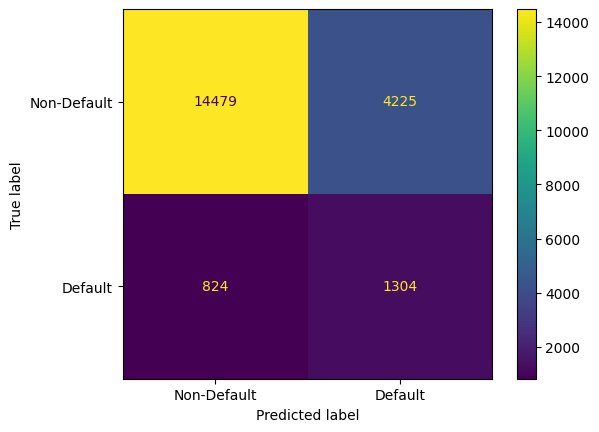

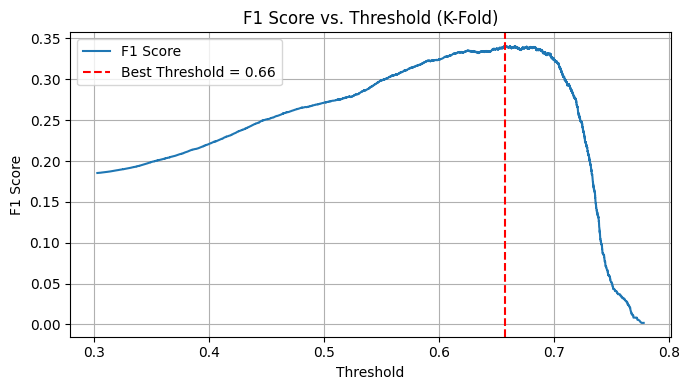

In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, precision_recall_curve
)
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt

def evaluate_final_model_with_kfold(X, y, best_params, k=5):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    all_y_true = []
    all_y_prob = []

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Apply undersampling
        rus = RandomUnderSampler(random_state=42)
        X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

        # Train model with best params
        model = XGBClassifier(
            objective='binary:logistic',
            eval_metric='logloss',
            tree_method='hist',
            random_state=42,
            **best_params
        )
        model.fit(X_resampled, y_resampled)

        # Predict probabilities on validation set
        y_val_prob = model.predict_proba(X_val)[:, 1]
        all_y_true.extend(y_val)
        all_y_prob.extend(y_val_prob)

    # Convert to arrays
    all_y_true = np.array(all_y_true)
    all_y_prob = np.array(all_y_prob)

    # Find best threshold by F1
    precision, recall, thresholds = precision_recall_curve(all_y_true, all_y_prob)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-6)
    f1 = f1[:-1]  # match thresholds
    best_thresh = thresholds[np.argmax(f1)]

    # Final predictions at best threshold
    y_pred = (all_y_prob >= best_thresh).astype(int)

    # Print metrics
    print(f"✅ Best Threshold: {best_thresh:.4f}")
    print(f"Precision: {precision_score(all_y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(all_y_true, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(all_y_true, y_pred):.4f}")
    print(f"AUC Score: {roc_auc_score(all_y_true, all_y_prob):.4f}")

    print("\n📋 Classification Report:")
    print(classification_report(all_y_true, y_pred, target_names=["Non-Default", "Default"]))

    # Confusion matrix
    cm = confusion_matrix(all_y_true, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Non-Default", "Default"]).plot()

    # Plot F1 vs. threshold
    plt.figure(figsize=(7, 4))
    plt.plot(thresholds, f1, label="F1 Score")
    plt.axvline(best_thresh, color='red', linestyle='--', label=f"Best Threshold = {best_thresh:.2f}")
    plt.xlabel("Threshold")
    plt.ylabel("F1 Score")
    plt.title("F1 Score vs. Threshold (K-Fold)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return best_thresh

best_threshold = evaluate_final_model_with_kfold(X, y, random_search.best_params_)


## Hyperparameter tuning for 2:1 resampling XGBOOST

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import numpy as np
from xgboost import XGBClassifier

model = XGBClassifier(
    eval_metric='logloss',
    objective='binary:logistic',
    learning_rate=0.03,          # ⬇️ slower learning = better generalization
    n_estimators=300,            # ⬆️ more trees for stability
    max_depth=3,                 # ⬇️ shallow trees avoid overfitting
    subsample=0.8,               # ⬇️ avoid overfitting
    colsample_bytree=0.8,        # ⬇️ use subset of features
    min_child_weight=5,          # ⬆️ avoid splitting on small noisy groups
    reg_alpha=4,                 # ⬆️ L1 regularization (sparse)
    reg_lambda=1.1,              # ⬆️ L2 regularization
    random_state=42
)

# Initialize CV and metrics
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
precision_scores, recall_scores, f1_scores, auc_scores = [], [], [], []

for train_idx, val_idx in skf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # 2:1 undersampling (majority:minority)
    class_counts = Counter(y_train_fold)
    n_minority = class_counts[1]
    sampling_strategy = {0: 2 * n_minority}
    rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X_train_fold, y_train_fold)

    # Fit model on resampled data
    model.fit(X_resampled, y_resampled)

    # Predict on original (unbalanced) validation set
    y_pred = model.predict(X_val_fold)
    y_prob = model.predict_proba(X_val_fold)[:, 1]

    # Compute metrics
    precision_scores.append(precision_score(y_val_fold, y_pred))
    recall_scores.append(recall_score(y_val_fold, y_pred))
    f1_scores.append(f1_score(y_val_fold, y_pred))
    auc_scores.append(roc_auc_score(y_val_fold, y_prob))

# Report average metrics
print("📊 XGBoost (with 2:1 Undersampling) Performance (5-Fold CV):")
print(f"Precision: {np.mean(precision_scores):.4f}")
print(f"Recall:    {np.mean(recall_scores):.4f}")
print(f"F1 Score:  {np.mean(f1_scores):.4f}")
print(f"AUC Score: {np.mean(auc_scores):.4f}")


📊 XGBoost (with 2:1 Undersampling) Performance (5-Fold CV):
Precision: 0.2593
Recall:    0.4958
F1 Score:  0.3403
AUC Score: 0.7728


In [ ]:
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pandas as pd
import numpy as np

# Apply 2:1 undersampling on training set
class_counts = Counter(y)
n_minority = class_counts[1]
sampling_strategy = {0: 2 * n_minority}
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Fit final model with chosen hyperparameters
final_model = XGBClassifier(
    eval_metric='logloss',
    objective='binary:logistic',
    learning_rate=0.03,
    n_estimators=300,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=5,
    reg_alpha=4,
    reg_lambda=1.1,
    tree_method='hist',
    random_state=42
)

final_model.fit(X_resampled, y_resampled)


## Logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

import numpy as np

# Initialize
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
precision_scores, recall_scores, f1_scores, auc_scores = [], [], [], []

# Cross-validation loop
for train_idx, val_idx in kf.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Pipeline: scaling + logistic regression
    model = make_pipeline(
        StandardScaler(),
        LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
    )
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    # Metrics
    precision_scores.append(precision_score(y_val, y_pred))
    recall_scores.append(recall_score(y_val, y_pred))
    f1_scores.append(f1_score(y_val, y_pred))
    auc_scores.append(roc_auc_score(y_val, y_prob))

# Print results
print(f"Logistic Regression Performance (5-Fold CV):")
print(f"Precision: {np.mean(precision_scores):.4f}")
print(f"Recall:    {np.mean(recall_scores):.4f}")
print(f"F1 Score:  {np.mean(f1_scores):.4f}")
print(f"AUC Score: {np.mean(auc_scores):.4f}")


Logistic Regression Performance (5-Fold CV):
Precision: 0.1930
Recall:    0.7157
F1 Score:  0.3040
AUC Score: 0.7496


## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

def find_best_threshold_svm(X, y):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    all_y_true = []
    all_y_prob = []

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = make_pipeline(
            StandardScaler(),
            SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
        )
        model.fit(X_train, y_train)
        y_val_prob = model.predict_proba(X_val)[:, 1]

        all_y_true.extend(y_val)
        all_y_prob.extend(y_val_prob)

    # Compute precision-recall curve
    precision, recall, thresholds = precision_recall_curve(all_y_true, all_y_prob)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_idx = f1_scores.argmax()
    best_thresh = thresholds[best_idx]
    best_f1 = f1_scores[best_idx]

    print(f"✅ Best Threshold: {best_thresh:.4f}")
    print(f"🎯 Best F1 Score: {best_f1:.4f}")

    return best_thresh

best_threshold = find_best_threshold_svm(X, y)

✅ Best Threshold: 0.1469
🎯 Best F1 Score: 0.3245


In [ ]:
# Use best threshold
threshold = best_threshold

# K-Fold setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_y_true = []
all_y_prob = []

# Store predictions from all folds
for train_idx, val_idx in kf.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = make_pipeline(
        StandardScaler(),
        SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
    )
    model.fit(X_train, y_train)

    y_val_prob = model.predict_proba(X_val)[:, 1]
    
    all_y_true.extend(y_val)
    all_y_prob.extend(y_val_prob)

# Convert to arrays
all_y_true = np.array(all_y_true)
all_y_prob = np.array(all_y_prob)
all_y_pred = (all_y_prob >= threshold).astype(int)

# Metrics
precision = precision_score(all_y_true, all_y_pred)
recall = recall_score(all_y_true, all_y_pred)
f1 = f1_score(all_y_true, all_y_pred)
auc = roc_auc_score(all_y_true, all_y_prob)

# Report
print("📊 SVM (RBF) Performance with 5-Fold CV:")
print(f"Threshold: {threshold:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC Score: {auc:.4f}")


📊 SVM (RBF) Performance with 5-Fold CV:
Threshold: 0.1469
Precision: 0.2250
Recall:    0.5813
F1 Score:  0.3245
AUC Score: 0.7553


In [142]:
# Train final SVM on full data
svm_model = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
)
svm_model.fit(X, y)

# Predict on the test set (ensure columns match training)
y_test_prob = svm_model.predict_proba(test)[:, 1]

# Choose a best threshold
y_test_pred = (y_test_prob >= best_threshold).astype(int)

# Load original test.csv to get the correct IDs
test_original = pd.read_csv("test.csv")
# Make sure you align rows if any were dropped earlier
valid_ids = test_original.loc[test.index, "id"]

In [ ]:
# Assuming y_test_pred is predicted binary outcome array
outcome_distribution = pd.Series(y_test_pred).value_counts(normalize=True).rename("proportion")
print("📊 Proportion of predicted outcomes:")
print(outcome_distribution)

📊 Proportion of predicted outcomes:
0    0.722
1    0.278
Name: proportion, dtype: float64


# Test set

In [45]:
test = pd.read_csv("test.csv")

# Convert date_of_birth to datetime
test['date_of_birth'] = pd.to_datetime(test['date_of_birth'], errors='coerce')

# Generate age from date_of_birth
reference_date = pd.to_datetime("2025-05-01")
test['age'] = (reference_date - test['date_of_birth']).dt.days // 365

# Drop rows where age > 100
test = test[test['age'] <= 100]

# Replace -1 in number_dependants with mode (0)
test['number_dependants'] = test['number_dependants'].replace(-1, 0)

# Drop unnecessary columns
columns_to_drop = ['id', 'date_of_birth']
test = test.drop(columns=[col for col in columns_to_drop if col in test.columns], errors='ignore')

# Apply the same custom features used in training
test['util_income_interaction'] = test['credit_utilization'] * test['monthly_income']
test['age_loans_interaction'] = test['age'] * test['number_open_loans']
test['income_score1_interaction'] = test['monthly_income'] * test['score1']
test['income_score2_interaction'] = test['monthly_income'] * test['score2']
test['loans_per_credit_line'] = test['number_open_loans'] / (1 + test['number_open_credit_lines'])
test['debt_to_income_utilization'] = test['debt_to_income_ratio'] * test['credit_utilization']
test['age_income_ratio'] = test['monthly_income'] / test['age']

## XGBoost with 1:1 resampling

In [63]:
y_test_prob = final_model.predict_proba(test)[:, 1]
y_test_pred = (y_test_prob >= best_threshold).astype(int)  # use your best threshold from earlier

# Load original test file to recover IDs
test_original = pd.read_csv("test.csv")

# Align index after dropping rows
valid_ids = test_original.loc[test.index, 'id']

submission = pd.DataFrame({
    'id': valid_ids,
    'prediction': y_test_prob,
    'outcome': y_test_pred
})

In [64]:
print(pd.Series(y_test_pred).value_counts(normalize=True).rename("proportion"))



0    0.704
1    0.296
Name: proportion, dtype: float64


## XGBoost with 2:1 resampling

In [ ]:
# Load and preprocess test set (if not done already)
test_original = pd.read_csv("test.csv")
test = test_original.copy()

# Apply same feature engineering
test['date_of_birth'] = pd.to_datetime(test['date_of_birth'], errors='coerce')
reference_date = pd.to_datetime("2025-05-01")
test['age'] = (reference_date - test['date_of_birth']).dt.days // 365
test = test[test['age'] <= 100]
test['number_dependants'] = test['number_dependants'].replace(-1, 0)
test = test.drop(columns=['date_of_birth', 'id'], errors='ignore')

# Generate same features as training
test['util_income_interaction'] = test['credit_utilization'] * test['monthly_income']
test['age_loans_interaction'] = test['age'] * test['number_open_loans']
test['income_score1_interaction'] = test['monthly_income'] * test['score1']
test['income_score2_interaction'] = test['monthly_income'] * test['score2']
test['loans_per_credit_line'] = test['number_open_loans'] / (1 + test['number_open_credit_lines'])
test['debt_to_income_utilization'] = test['debt_to_income_ratio'] * test['credit_utilization']
test['age_income_ratio'] = test['monthly_income'] / test['age']

# Predict
y_test_prob = final_model.predict_proba(test)[:, 1]
threshold = 0.5  # Change this to chosen threshold
y_test_pred = (y_test_prob >= threshold).astype(int)

# Prepare submission
submission = pd.DataFrame({
    "id": test_original.loc[test.index, "id"],
    "prediction": y_test_prob,
    "outcome": y_test_pred
})

# Save submission to CSV
submission.to_csv("submission.csv", index=False)

In [49]:
# Show the proportion of predicted outcomes in the test set
print("📊 Predicted outcome proportions in test set:")
print(submission["outcome"].value_counts(normalize=True).rename("proportion"))

📊 Predicted outcome proportions in test set:
outcome
0    0.786
1    0.214
Name: proportion, dtype: float64


# Summary
After trying these models, XGBoost with 2:1 undersampling method has good performance, with a relatively higher precision, and highest AUC. Besides, it gives a reasonable proportion of predicted test target, which will be shown in the Test set part of the report. However, considering recall and F1 score, 1:1 undersampling is good too.

In [72]:
import pandas as pd

# Base performance data
performance_data = {
    "Model": [
        "XGBoost",
        "XGBoost",
        "Logistic Regression",
        "SVM (RBF Kernel)"
    ],
    "Sampling": [
        "2:1 Undersample",
        "1:1 Undersample",
        "Original + Class Weight",
        "Original + Class Weight"
    ],
    "Precision": [0.2593, 0.2548, 0.1930, 0.2250],
    "Recall": [0.4958, 0.5174, 0.7157, 0.5813],
    "F1 Score": [0.3403, 0.3414, 0.3040, 0.3245],
    "AUC Score": [0.7728, 0.7722, 0.7496, 0.7553],
    "Predicted Class 1 Proportion": [0.214, 0.296, None, 0.278]
}

# Create DataFrame
performance_df = pd.DataFrame(performance_data)
performance_df


,Model,Sampling,Precision,Recall,F1 Score,AUC Score,Predicted Class 1 Proportion
0,XGBoost,2:1 Undersample,0.2593,0.4958,0.3403,0.7728,0.214
1,XGBoost,1:1 Undersample,0.2548,0.5174,0.3414,0.7722,0.296
2,Logistic Regression,Original + Class Weight,0.1930,0.7157,0.3040,0.7496,NaN
3,SVM (RBF Kernel),Original + Class Weight,0.2250,0.5813,0.3245,0.7553,0.278
